K-Means com o data set Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

Iremos utilizar o dataset Iris, que é um gênero de flor com cerca de 300 espécies que possuem tamanhos variados de pétalas e cepas.
Esta base de dados contém 3 espécies de Íris - Virgínica, Versicolor e Setosa

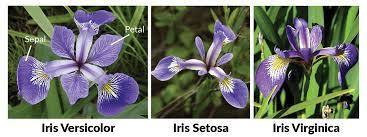

O conjunto que iremos utilizar traz 150 amostras das três espécies. Apesar de muito semelhantes, elas podem ser discriminadas pelo tamanho das cepas e pétalas.

In [3]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [9]:
import copy    #  Importar o copy
df_iris_original = copy.deepcopy(iris)  # Guardar a base de dados original para usar na avaliação final do resultado.

In [11]:
df_iris_original.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


k-means++ é um algoritmo que assegura uma inicialização mais inteligente dos centróides e melhora a qualidade do agrupamento. Ele escolhe pontos do data set para inicialização.

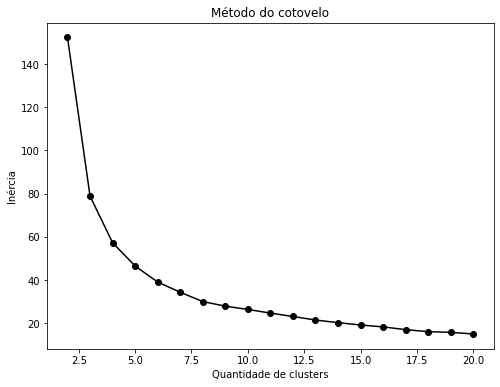

In [12]:
df = iris.drop('species', axis=1)
wcss = []
for n in range(2, 21):
  kmeans = KMeans(n_clusters=n, init = "k-means++", random_state=101)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,6))
plt.plot(range(2,21), wcss, "ko-")
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inércia')
plt.show()

In [41]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=101)
clusters = kmeans.fit_predict(df.values)

In [42]:
# Cria a coluna "Cluster" para adicionar os resultados ao DataFrame nos dados originais.
df_iris_original["Cluster"] = kmeans.labels_

In [43]:
df_iris_original.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
127,6.1,3.0,4.9,1.8,virginica,0
36,5.5,3.5,1.3,0.2,setosa,1
66,5.6,3.0,4.5,1.5,versicolor,0
144,6.7,3.3,5.7,2.5,virginica,2
67,5.8,2.7,4.1,1.0,versicolor,0
61,5.9,3.0,4.2,1.5,versicolor,0
86,6.7,3.1,4.7,1.5,versicolor,0
23,5.1,3.3,1.7,0.5,setosa,1


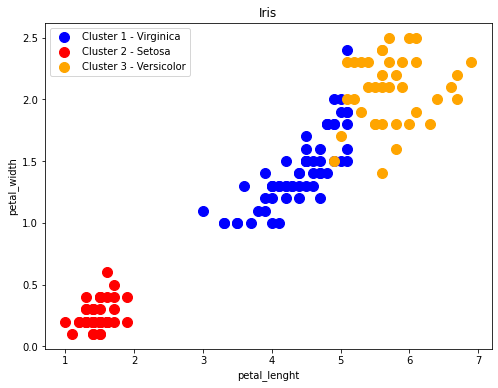

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(df_iris_original["petal_length"][df_iris_original["Cluster"]==0], df_iris_original["petal_width"][df_iris_original["Cluster"]==0], s = 100, c = 'blue', label = 'Cluster 1 - Virginica')
plt.scatter(df_iris_original["petal_length"][df_iris_original["Cluster"]==1], df_iris_original["petal_width"][df_iris_original["Cluster"]==1], s = 100, c = 'red', label = 'Cluster 2 - Setosa')
plt.scatter(df_iris_original["petal_length"][df_iris_original["Cluster"]==2], df_iris_original["petal_width"][df_iris_original["Cluster"]==2], s = 100, c = 'orange', label = 'Cluster 3 - Versicolor')

plt.title('Iris')
plt.xlabel('petal_lenght')
plt.ylabel('petal_width')
plt.legend()
plt.show()

In [45]:
def genero_Iris(X):
  y_Hat = kmeans.predict(X);
  if y_Hat == [0]:
    gen = "Virginica"
  elif y_Hat == [1]:
    gen = "Setosa"
  else:
    gen = "Versicolor"
  return gen

In [46]:
genero_Iris([[2,3,4,5]])

'Virginica'